### COVID-19 
### UPDATE by DAY in the countries: 
#### CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA, LUXEMBOURG, UK, CANADA, VIETNAM
#### (Start recorded day: 22.01.2020)

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


In [2]:
# len(countries_no_infopopulation), countries_no_infopopulation

### Number of covid-19 outbreak days 

In [3]:
rcParams['figure.figsize'] = 20, 10
len(data)

544

In [4]:
updated_date=files[-1].split('.')[0]
updated_date

'07-18-2021'

### COVID situation in the World is being changed by day
### ARE WE BEATING COVID-19?

The World still has 60951595.0 active cases

In last 7 days:  [59756326. 59983072. 60185868. 60466617. 60666164. 60851591. 60951595.]


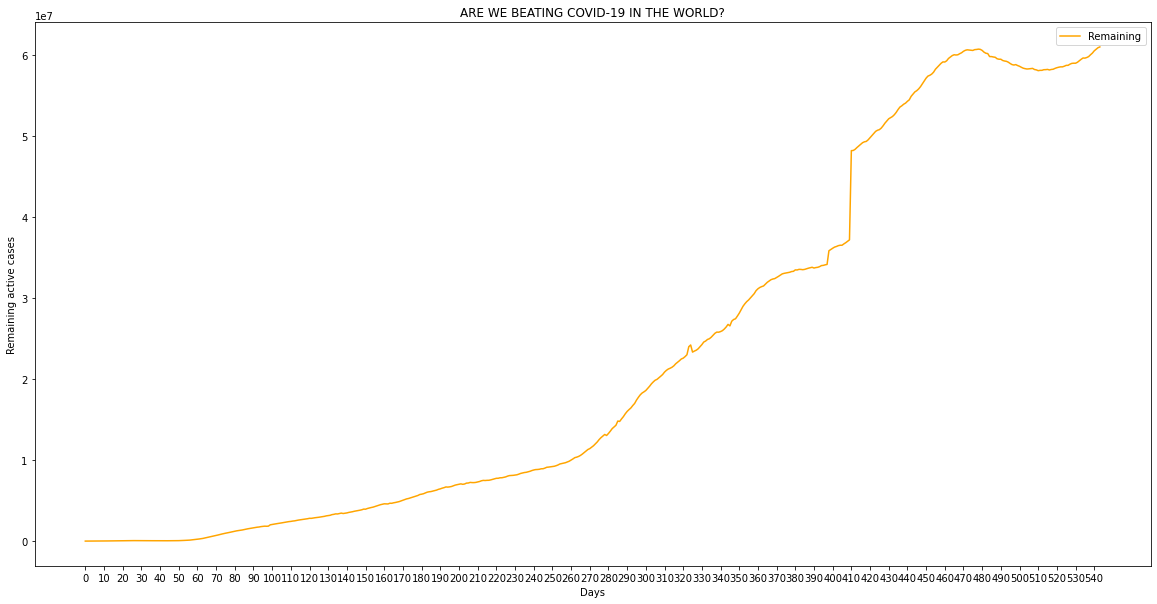

In [5]:
# Formula
remaining_by_day = np.array(totalconfirmed_by_day) - np.array(totalrecovered_by_day) - np.array(totalfatalities_by_day)

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, remaining_by_day, color='orange', label='Remaining')
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid.jpg')
print("The World still has %0.1f active cases\n"% remaining_by_day[-1])
print("In last 7 days: ", remaining_by_day[-7:])

In [6]:
countries_remaining = countries_confirmed-countries_fatalities-countries_recovered
# Mitigate the negative values by converting all negative values to 0
countries_remaining.mask(countries_remaining<0, 0, inplace=True)

# check last day
countries_remaining.tail(1)

,Micronesia,Curacao,Congo (Brazzaville),Sudan,Jamaica,Jersey,Kosovo,Andorra,Ivory Coast,Iran,...,Ireland,Slovenia,Slovakia,French Guiana,Germany,Grenada,Colombia,US,Palau,Others_and_ships
543,0.0,0.0,1002.0,3563.0,3664.0,0.0,99.0,302.0,0.0,301042.0,...,256128.0,762.0,124276.0,0.0,22146.0,0.0,133882.0,33470941.0,0.0,0.0


#### Notes: remaining number does not include the recovered data in US

In [7]:
daily_confirmed_sum = np.array([sum(countries_confirmed.iloc[i]) for i in range(len(countries_confirmed))])
daily_fatal_sum = np.array([sum(countries_fatalities.iloc[i]) for i in range(len(countries_fatalities))])
daily_recovered_sum = np.array([sum(countries_recovered.iloc[i]) for i in range(len(countries_recovered))])

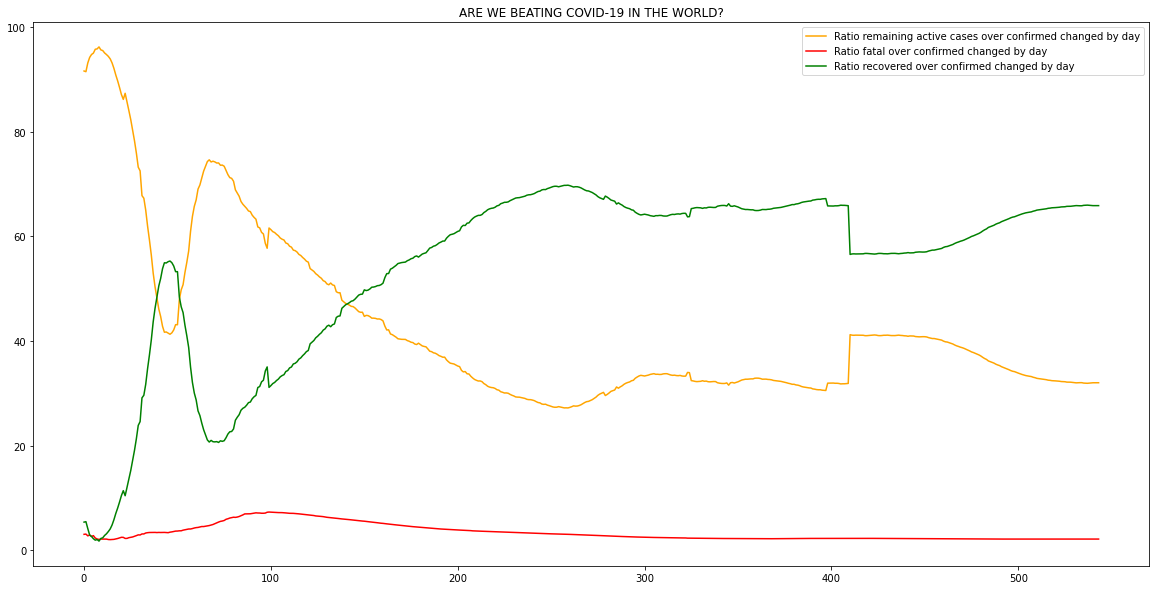

In [8]:
plt.plot(x_dat, ((daily_confirmed_sum-daily_recovered_sum-daily_fatal_sum)/daily_confirmed_sum)*100, color='orange', label='Ratio remaining active cases over confirmed changed by day')
plt.plot(x_dat, (daily_fatal_sum/daily_confirmed_sum)*100, color='red', label='Ratio fatal over confirmed changed by day')
plt.plot(x_dat, (daily_recovered_sum/daily_confirmed_sum)*100, color='green', label='Ratio recovered over confirmed changed by day')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid_ratio.jpg')

### Top places/ countries with least remaining COVID cases

,543
Micronesia,0.0
Taipei and environs,0.0
North Ireland,0.0
East Timor,0.0
Palau,0.0
Guadeloupe,0.0
Cape Verde,0.0
Azerbaijan,0.0
MS Zaandam,0.0
Guernsey,0.0


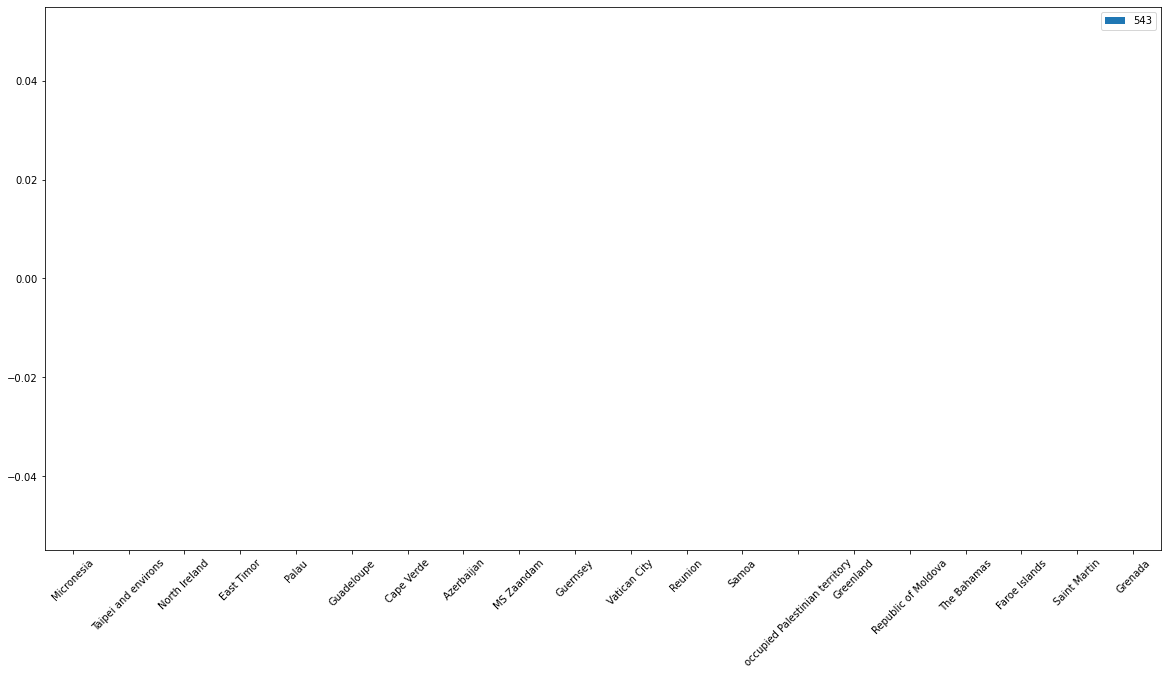

In [9]:
index = countries_remaining.tail(1)
top_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=True).head(20)
top_remaining.plot(kind='bar')
plt.xticks(rotation=45)
top_remaining

,Micronesia,Taipei and environs,North Ireland,East Timor,Palau,Guadeloupe,Cape Verde,Azerbaijan,MS Zaandam,Guernsey,Vatican City,Reunion,Samoa,occupied Palestinian territory,Greenland,Republic of Moldova,The Bahamas,Faroe Islands,Saint Martin,Grenada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


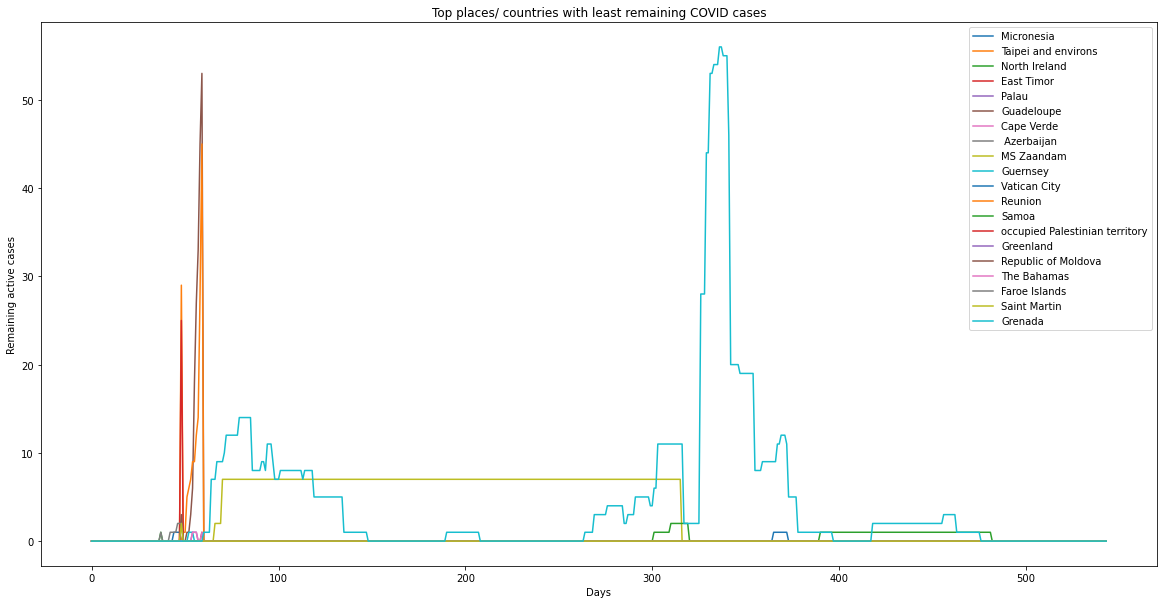

In [10]:
countries_remaining[top_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries with least remaining COVID cases")
countries_remaining[top_remaining.index]

### Top places/ countries with most remaining COVID cases

,543
US,33470941.0
France,5409528.0
United Kingdom,5309858.0
Spain,3868750.0
Netherlands,1781331.0
Brazil,1529546.0
Sweden,1079641.0
Belgium,1078204.0
Serbia,711507.0
Indonesia,542236.0


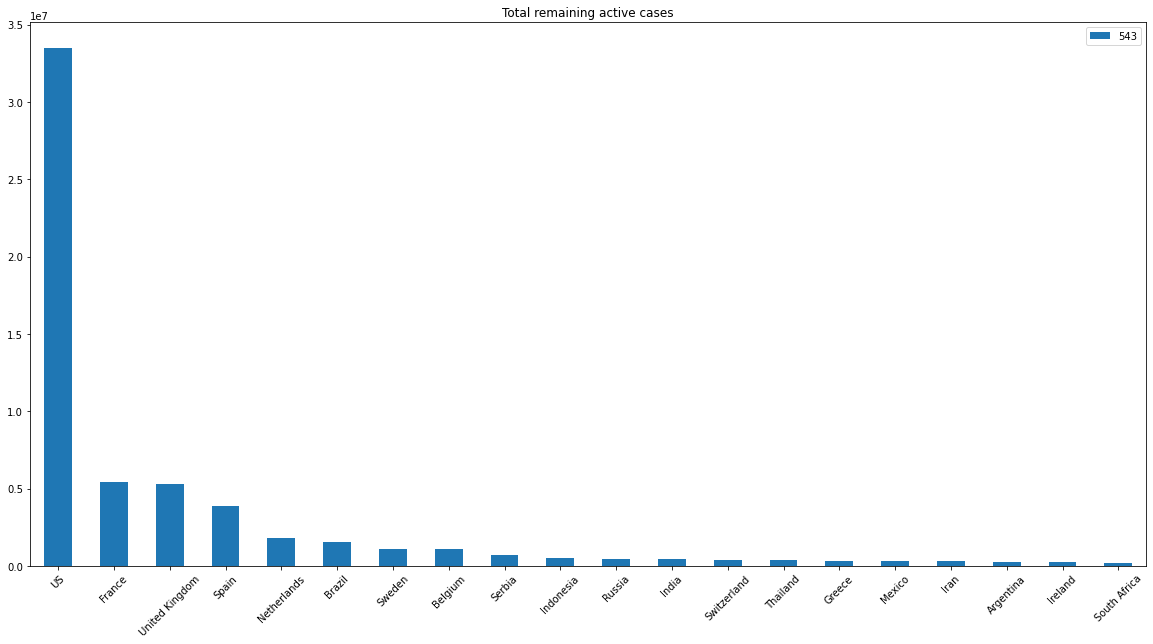

In [11]:
bottom_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=False).head(20)
bottom_remaining.plot(kind='bar')
plt.title("Total remaining active cases")
plt.xticks(rotation=45)
bottom_remaining

Text(0.5, 1.0, 'Top places/ countries with most remaining COVID cases')

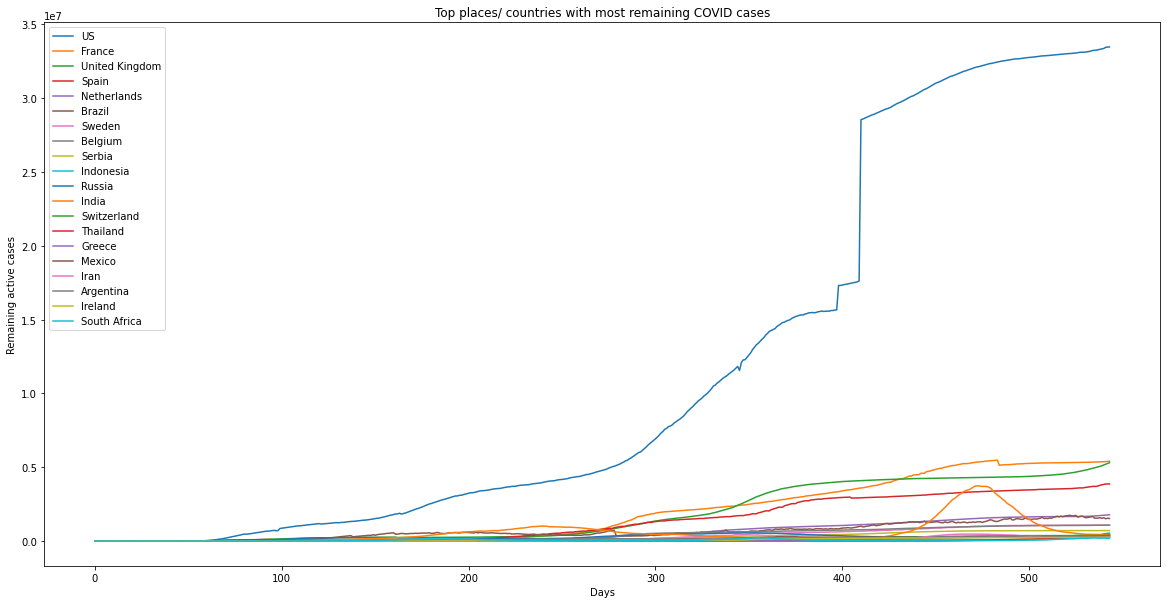

In [12]:
countries_remaining[bottom_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries with most remaining COVID cases")

#### The current remaining days is not included with the recovered data from US. 
#### See: https://github.com/CSSEGISandData/COVID-19/issues/3464